In [2]:
# Import dependencies
import torch
import torch.nn as nn
from plot_lib import set_default, show_scatterplot, plot_bases
from matplotlib.pyplot import plot, title, axis

In [3]:
# Set up your device 
cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if cuda else "cpu")

In [4]:
# Set up random seed to 1008. Do not change the random seed.
seed = 1008
torch.manual_seed(seed)
if cuda:
    torch.cuda.manual_seed_all(seed)

# 1. Full, slice, fill
Write a function `warm_up` that returns the 2D tensor with integers below. **Do not use any loops**.

```
1 2 1 1 1 1 2 1 1 1 1 2 1
2 2 2 2 2 2 2 2 2 2 2 2 2
1 2 1 1 1 1 2 1 1 1 1 2 1
1 2 1 3 3 1 2 1 3 3 1 2 1
1 2 1 3 3 1 2 1 3 3 1 2 1
1 2 1 1 1 1 2 1 1 1 1 2 1
2 2 2 2 2 2 2 2 2 2 2 2 2
1 2 1 1 1 1 2 1 1 1 1 2 1
1 2 1 3 3 1 2 1 3 3 1 2 1
1 2 1 3 3 1 2 1 3 3 1 2 1
1 2 1 1 1 1 2 1 1 1 1 2 1
2 2 2 2 2 2 2 2 2 2 2 2 2
1 2 1 1 1 1 2 1 1 1 1 2 1
```


Hint: Use `torch.full`, `torch.fill_`, and the slicing operator.

In [5]:
def warm_up():
#     raise NotImplementedError()
    warm_up_tensor= torch.full((13,13), 1)
    warm_up_tensor[1].fill_(2)
    warm_up_tensor[:,1].fill_(2)
    warm_up_tensor[6].fill_(2)
    warm_up_tensor[:,6].fill_(2)
    warm_up_tensor[11].fill_(2)
    warm_up_tensor[:,11].fill_(2)
    warm_up_tensor[3:5,3:5].fill_(3)
    warm_up_tensor[3:5,8:10].fill_(3)
    warm_up_tensor[8:10,3:5].fill_(3)
    warm_up_tensor[8:10,8:10].fill_(3)
    return warm_up_tensor

# Uncomment line below once you implement this function. 
print(warm_up())

tensor([[ 1.,  2.,  1.,  1.,  1.,  1.,  2.,  1.,  1.,  1.,  1.,  2.,
          1.],
        [ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
          2.],
        [ 1.,  2.,  1.,  1.,  1.,  1.,  2.,  1.,  1.,  1.,  1.,  2.,
          1.],
        [ 1.,  2.,  1.,  3.,  3.,  1.,  2.,  1.,  3.,  3.,  1.,  2.,
          1.],
        [ 1.,  2.,  1.,  3.,  3.,  1.,  2.,  1.,  3.,  3.,  1.,  2.,
          1.],
        [ 1.,  2.,  1.,  1.,  1.,  1.,  2.,  1.,  1.,  1.,  1.,  2.,
          1.],
        [ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
          2.],
        [ 1.,  2.,  1.,  1.,  1.,  1.,  2.,  1.,  1.,  1.,  1.,  2.,
          1.],
        [ 1.,  2.,  1.,  3.,  3.,  1.,  2.,  1.,  3.,  3.,  1.,  2.,
          1.],
        [ 1.,  2.,  1.,  3.,  3.,  1.,  2.,  1.,  3.,  3.,  1.,  2.,
          1.],
        [ 1.,  2.,  1.,  1.,  1.,  1.,  2.,  1.,  1.,  1.,  1.,  2.,
          1.],
        [ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
       

# 2. To Loop or not to loop

## 2.1. `mul_row_loop`
Write a function `mul_row_loop`, using python loops (and not even slicing operators), that gets a 2D tensor
as input, and returns a tensor of same size, equal to the one given as argument, with the first row
kept unchanged, the second multiplied by two, the third by three, etc.
For instance:
```
>>> t = torch.full((4, 8), 2.0)
>>> t
tensor([[2., 2., 2., 2., 2., 2., 2., 2.],
[2., 2., 2., 2., 2., 2., 2., 2.],
[2., 2., 2., 2., 2., 2., 2., 2.],
[2., 2., 2., 2., 2., 2., 2., 2.]])
>>> mul_row(t)
tensor([[2., 2., 2., 2., 2., 2., 2., 2.],
[4., 4., 4., 4., 4., 4., 4., 4.],
[6., 6., 6., 6., 6., 6., 6., 6.],
[8., 8., 8., 8., 8., 8., 8., 8.]])
```

In [17]:
def mul_row_loop(input_tensor):
    row,col = input_tensor.size()
    for i in range(0,row):
        for j in range(0,col):
            input_tensor[i,j] *= i+1
#         input_tensor[i] *= i+1
    return input_tensor
#     raise NotImplementedError()
t = torch.full((4, 8), 2.0)
# print(mul_row_loop(t))sw

# 2.2. `mul_row_fast`
Write a second version of the same function named `mul_row_fast` which uses tensor operations and no looping.

**Hint**: Use broadcasting and `torch.arange`, `torch.view`, and `torch.mul`.

In [22]:
def mul_row_fast(input_tensor):
    row,col = input_tensor.size()
#     print(input_tensor)
#     print(torch.arange(1,row+1,1).view(row,1))
    return torch.mul(input_tensor,torch.arange(1,row+1,1).view(row,1))

t = torch.full((4, 8), 2.0)
p = torch.arange(1,33,1).view(4,8)
# print(mul_row_fast(p))
print(mul_row_fast(t))
#     raise NotImplementedError()

tensor([[ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.],
        [ 4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.],
        [ 6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.],
        [ 8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.]])


# 2.3. `times`
Write a function `times` which takes a 2D tensor as input and returns the run times of `mul_row_loop` and `mul_row_fast` on this tensor, respectively. Use `time.perf_counter`.

Use `torch.ones` to create a 2D tensor of size (1000, 400) full of ones and run `times` on it (there should be more than two orders of magnitude difference).

In [20]:
import time
from time import perf_counter
def times(input_tensor):
    start = time.perf_counter()
    mul_row_loop(input_tensor)
    end = time.perf_counter()
    loop_run_time = end - start
    start = time.perf_counter()
    mul_row_fast(input_tensor)
    end = time.perf_counter()
    fast_run_time = end - start
    return loop_run_time ,fast_run_time 
#     raise NotImplementedError()

# Uncomment lines below once you implement this function. 
input_tensor = torch.ones(1000,400)#TODO
# time_1, time_2 = times(random_tensor)
time_1, time_2 = times(input_tensor)
print('{}, {}'.format(time_1, time_2))

4.448902083997382, 0.000852269004099071


# 3. Non-linearities

## 3.1. ReLU
ReLU (Rectified Linear Unit) is a non-linear activation fuction defined as:

$$y = \mathrm{max}(0,x)$$

Define a fully connected neural network `linear_fc_relu` which:
- takes 2 dimensional data as input and passes it through linear modules (`torch.nn.Linear`)
- has one hidden layer of dimension 5 
- has output dimension of 2
- has ReLu as an activation function

Create a tensor with input data $X$ of size (100, 2) using `torch.randn`. 

Following the example in https://github.com/Atcold/pytorch-Deep-Learning-Minicourse/blob/master/02-space_stretching.ipynb, visualize the output of passing `X` through the neural network `linear_fc_relu`.

In [9]:
# Input data
X = torch.randn(100,2)#TODO

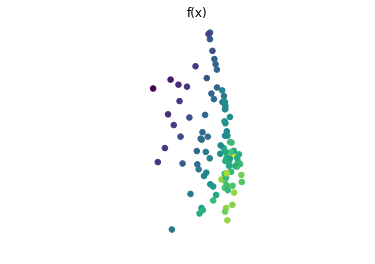

In [24]:
# create 1-layer neural networks with ReLU activation
import matplotlib.cm as cm
import numpy as np

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
n_hidden = 5
linear_fc_relu = nn.Sequential(
            nn.Linear(2, n_hidden), 
            nn.ReLU(), 
            nn.Linear(n_hidden, 2))

# Visualize: TODO
# print(np.linspace(0, 1, 2))
# colors = cm.rainbow(np.linspace(0, 1, 3))
colors = X[:, 0]

with torch.no_grad():
    Y = linear_fc_relu(X)
show_scatterplot(Y, colors, title='f(x)')

## 3.2. Sigmoid
The sigmoid function is another popular choice for a non-linear activation function which maps its input to values in the interval $(0,1)$. It is formally defined as:

$$\sigma(x) = \frac{1}{1+ e^{-x}}$$

Define a new neural network `linear_fc_sigmoid` which is the same architecture as in part `3.1.` but with a sigmoid unit instead of ReLU. 

Using the same $X$ as in part `3.1`, visualize the output of passing `X` through the neural network `linear_fc_sigmoid`.

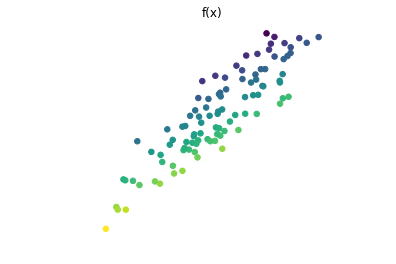

In [23]:
# create 1-layer neural networks with Sigmoid activation
# linear_fc_sigmoid = device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
linear_fc_sigmoid = nn.Sequential(
            nn.Linear(2, n_hidden), 
            nn.Sigmoid(), 
            nn.Linear(n_hidden, 2))
# Visualize: TODO
# print(np.linspace(0, 1, 2))
# colors = cm.rainbow(np.linspace(0, 1, 3))
colors = X[:, 0]

with torch.no_grad():
    Y = linear_fc_sigmoid(X)
show_scatterplot(Y, colors, title='f(x)')